In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import essential libraries.

In [2]:
volcano=pd.read_csv(r"C:\Users\singa tharun reddy\Desktop\Github projects\Volcano_eruptions\database.csv")

In [3]:
volcano.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [4]:
volcano.shape

(1508, 12)

In [5]:
volcano.nunique()

Number                 1508
Name                   1478
Country                 100
Region                   19
Type                     33
Activity Evidence         6
Last Known Eruption     399
Latitude               1445
Longitude              1468
Elevation (Meters)     1208
Dominant Rock Type       11
Tectonic Setting         11
dtype: int64

In [6]:
volcano.isna().sum()

Number                  0
Name                    0
Country                 0
Region                  0
Type                    0
Activity Evidence       1
Last Known Eruption     0
Latitude                0
Longitude               0
Elevation (Meters)      0
Dominant Rock Type     53
Tectonic Setting        7
dtype: int64

In [7]:
volcano["Tectonic Setting"].fillna(value="Unkown", inplace=True)

In [8]:
volcano["Dominant Rock Type"].fillna(value="Other", inplace=True)

In [9]:
volcano.isna().sum()

Number                 0
Name                   0
Country                0
Region                 0
Type                   0
Activity Evidence      1
Last Known Eruption    0
Latitude               0
Longitude              0
Elevation (Meters)     0
Dominant Rock Type     0
Tectonic Setting       0
dtype: int64

In [10]:
volcano.dropna(inplace=True)

In [12]:
volcano["Tectonic Setting"].value_counts()

Subduction Zone / Continental Crust (>25 km)       762
Intraplate / Continental Crust (>25 km)            156
Subduction Zone / Oceanic Crust (< 15 km)          131
Rift Zone / Continental Crust (>25 km)             109
Rift Zone / Oceanic Crust (< 15 km)                101
Subduction Zone / Crust Thickness Unknown           83
Subduction Zone / Intermediate Crust (15-25 km)     78
Rift Zone / Intermediate Crust (15-25 km)           43
Intraplate / Oceanic Crust (< 15 km)                31
Unkown                                               7
Intraplate / Intermediate Crust (15-25 km)           5
Unknown                                              1
Name: Tectonic Setting, dtype: int64

In [15]:
volcano["Tectonic Setting"]=volcano["Tectonic Setting"].str.replace("Unkown", "Unknown")

In [16]:
volcano["Tectonic Setting"].value_counts()

Subduction Zone / Continental Crust (>25 km)       762
Intraplate / Continental Crust (>25 km)            156
Subduction Zone / Oceanic Crust (< 15 km)          131
Rift Zone / Continental Crust (>25 km)             109
Rift Zone / Oceanic Crust (< 15 km)                101
Subduction Zone / Crust Thickness Unknown           83
Subduction Zone / Intermediate Crust (15-25 km)     78
Rift Zone / Intermediate Crust (15-25 km)           43
Intraplate / Oceanic Crust (< 15 km)                31
Unknown                                              8
Intraplate / Intermediate Crust (15-25 km)           5
Name: Tectonic Setting, dtype: int64

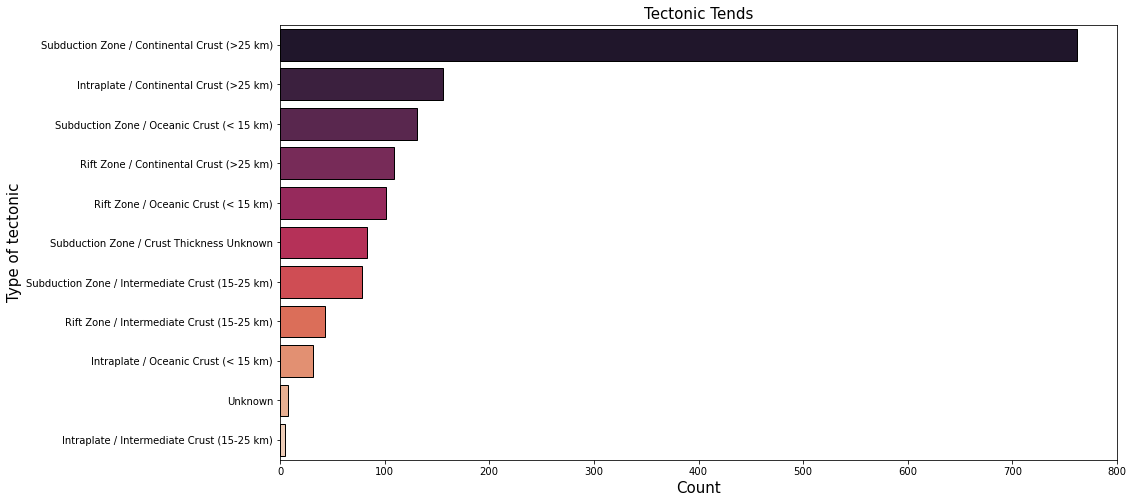

In [18]:
Tectonic=volcano["Tectonic Setting"].value_counts()
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=Tectonic.values,y=Tectonic.index,palette="rocket",edgecolor='black')
plt.ylabel("Type of tectonic", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Count", fontsize=15)
plt.title("Tectonic Tends",fontsize=15)
plt.show()

In [22]:
volcano.nunique()

Number                 1507
Name                   1477
Country                 100
Region                   19
Type                     33
Activity Evidence         6
Last Known Eruption     399
Latitude               1444
Longitude              1467
Elevation (Meters)     1207
Dominant Rock Type       12
Tectonic Setting         11
dtype: int64

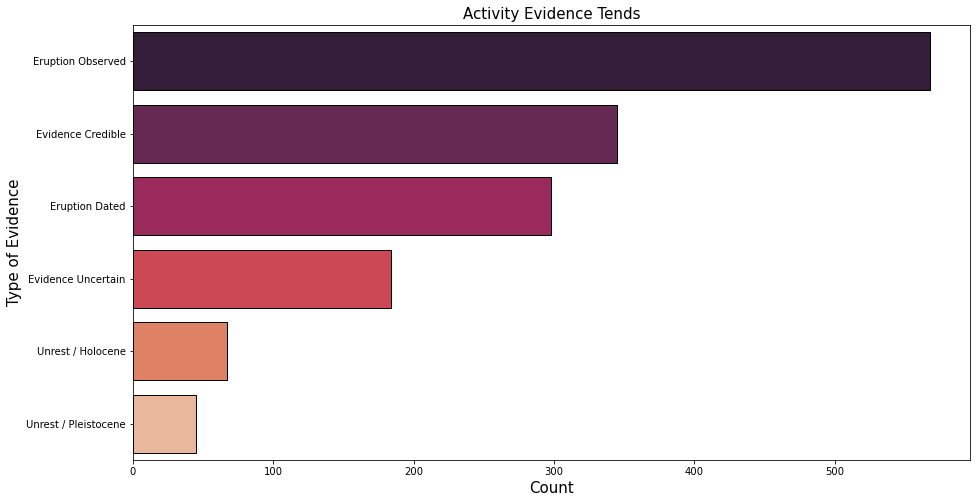

In [21]:
evidence=volcano["Activity Evidence"].value_counts()
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=evidence.values,y=evidence.index,palette="rocket",edgecolor='black')
plt.ylabel("Type of Evidence", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Count", fontsize=15)
plt.title("Activity Evidence Tends",fontsize=15)
plt.show()

In [40]:
elevation=volcano.groupby(["Tectonic Setting"])["Elevation (Meters)"].mean().reset_index()
elevation = elevation.sort_values(by="Elevation (Meters)",ascending=False)

In [43]:
elevation

,Tectonic Setting,Elevation (Meters)
6,Subduction Zone / Continental Crust (>25 km),2317.236220
0,Intraplate / Continental Crust (>25 km),1846.282051
3,Rift Zone / Continental Crust (>25 km),1787.412844
1,Intraplate / Intermediate Crust (15-25 km),1375.600000
8,Subduction Zone / Intermediate Crust (15-25 km),1018.974359
2,Intraplate / Oceanic Crust (< 15 km),927.645161
4,Rift Zone / Intermediate Crust (15-25 km),858.604651
7,Subduction Zone / Crust Thickness Unknown,545.409639
9,Subduction Zone / Oceanic Crust (< 15 km),484.679389
10,Unknown,467.375000


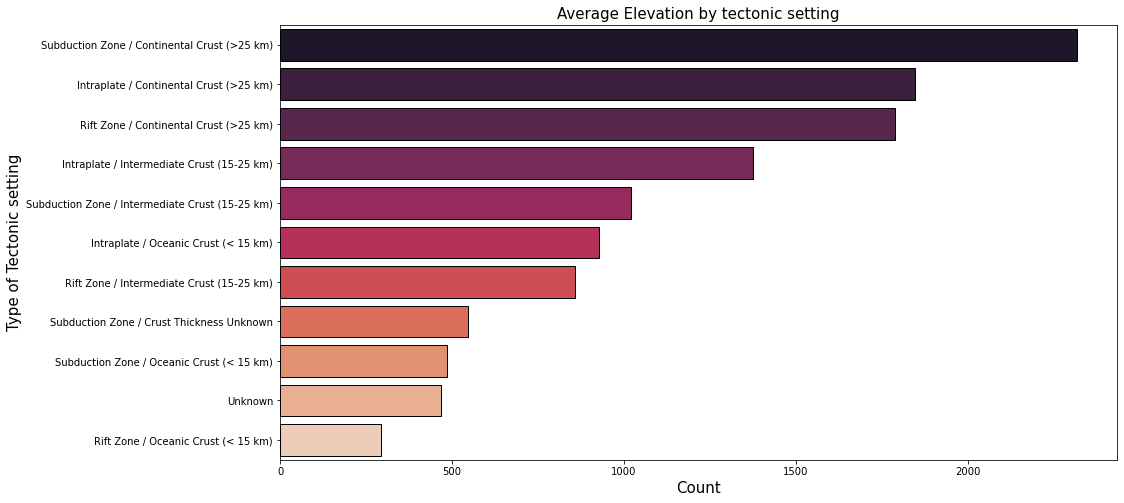

In [46]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=elevation["Tectonic Setting"],x=elevation["Elevation (Meters)"],palette="rocket",edgecolor='black')
plt.ylabel("Type of Tectonic setting", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Count", fontsize=15)
plt.title("Average Elevation by tectonic setting",fontsize=15)
plt.show()